<a href="https://colab.research.google.com/github/ajipermadi15/triangle_and_signal_response_classification/blob/main/Signal_Response_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> Akhmad Aji Permadi

#Signal Response

In this section, a classification will be made for second order system step response signals with input parameters in the form of 100 signal steps. The first thing to do here is create a dataset consisting of 100 signal steps as $X$ and the response signal type as label ($y$). <br> <br>
There are four types of response signals, namely:
```
0 : Undamped
1 : Underdamped
2 : Critically-damped
3 : Overdamped
```
Next, first a dataset will be created using code from Mr. Mursito (author) with slight modifications for adjustments.

In [ ]:
#@title orde2.py

import random as rd
from scipy.signal import lti, step2

tstep = []
tstep.extend(range(100))

def step_(psi=1, wn=10):
    a0 = 1.0
    a1 = (2.0 * psi) / wn
    a2 = 1.0 / (wn * wn)
    b0 = 1.0

    sys = lti([b0], [a0, a1, a2])
    return step2(sys, T=tstep)

def respond_types():
    return ["undamped", "underdamped","critically-damped","overdamped"]

def parameters():
    return ["time", "signal"]

def step():
    wn = (rd.random()/5) +0.9
    t = rd.randint(0,100)
    if t < 5:
        psi = 0
        d = 0
    elif t < 50:
        psi = rd.random()
        d = 1
    elif t < 60:
        psi = 1.0
        d = 2
    else:
        psi = (1 + rd.random()*2)
        psi = psi * psi
        d = 3

    t,y = step_(psi=psi, wn=wn)
    return d, t, y

TRAINING SET:
undamped = 37
underdamped = 330
critically-damped = 76
overdamped = 307


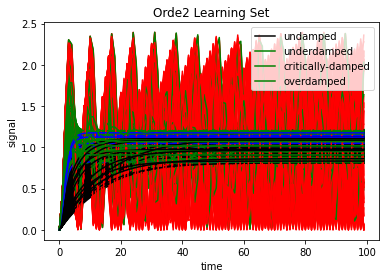

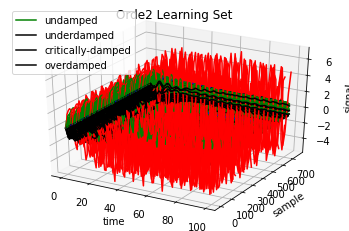

In [ ]:
#@title C-21-orde2.py (with modification)
# -*- coding: utf-8 -*-
"""
Created on Sun Sep  2 02:44:37 2018

@author: Mursito
"""

import sklearn as sk
import matplotlib.pyplot as plt
#import orde2 as orde2

# Get dataset of triangles
X=[]
y=[]
for i in range(1000):
    rtype, t, signal = step()
    X.append(signal)
    y.append(rtype)

legends=respond_types()
labels=parameters()

# Pisahkan data menjadi training dan testing set
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Print the training data
print("TRAINING SET:")
ctype=[0,0,0,0]
for i in range(len(y_train)):
    ctype[y_train[i]] += 1

for i in range(len(ctype)):
    print(legends[i], "=", ctype[i])

# Draw graphics in 3 Dimension
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

colors = ['red', 'green', 'blue', "black"]

lenx = len(X_train[0])
ys = [0]*lenx
xs = []
xs.extend(range(lenx))

for i in range(len(X)):
    zs = X[i]
    plt.plot(xs, zs, c=colors[y[i]])

plt.xlabel(labels[0])
plt.ylabel(labels[1])
plt.legend(legends)
plt.title("Orde2 Learning Set")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
lenx = len(X_train[0])

ys = [0]*lenx
xs = []
xs.extend(range(lenx))

for i in range(len(X_train)):
    zs = X_train[i]
    ys = [e+1 for e in ys]
    ax.plot(xs, ys, zs, c=colors[y_train[i]])

ax.set_ylabel("sample")
ax.set_xlabel(labels[0])
ax.set_zlabel(labels[1])
plt.legend(legends)
plt.title("Orde2 Learning Set")
plt.show()

In [ ]:
#@title Test Dataset Classes Information
c_type=[0,0,0,0]
for i in range(len(y_test)):
    c_type[y_test[i]] += 1

for i in range(len(c_type)):
    print(legends[i], "=", c_type[i])

undamped = 16
underdamped = 105
critically-damped = 33
overdamped = 96


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.95      0.98       105
           2       0.87      1.00      0.93        33
           3       1.00      0.99      0.99        96

    accuracy                           0.98       250
   macro avg       0.95      0.99      0.97       250
weighted avg       0.98      0.98      0.98       250



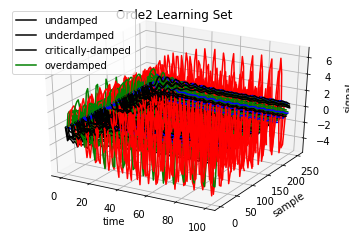

In [ ]:
#@title Training Model
# -*- coding: utf-8 -*-
"""
From Learning scikit-learn: Machine Learning in Python
MUST BE RUN AFTER C-11-triangle
"""

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30),
    activation='identity', # {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
    solver='adam',        # {‘lbfgs’, ‘sgd’, ‘adam’}
    learning_rate='invscaling', # {‘constant’, ‘invscaling’, ‘adaptive’}
    max_iter=1000,
    momentum=0.9,
    random_state=0)

mlp.fit(X_train,y_train)

y_mlp = mlp.predict(X_test)

'''
print("TESTING:")
for i in range(len(X_test)):
    if (y_mlp[i] == y_test[i]):
        print(y_mlp[i], "==", y_test[i])
    else:
        print(y_mlp[i], "<>", y_test[i])
'''

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_mlp))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
lenx = len(X_test[0])

ys = [0]*lenx
xs = []
xs.extend(range(lenx))

for i in range(len(X_test)):
    zs = X_test[i]
    ys = [e+1 for e in ys]
    ax.plot(xs, ys, zs, c=colors[y_mlp[i]])

ax.set_ylabel("sample")
ax.set_xlabel(labels[0])
ax.set_zlabel(labels[1])
plt.legend(legends)
plt.title("Orde2 Learning Set")
plt.show()